# Ising model

### Atomic units
$E \rightarrow E/J$ 

$T \rightarrow \frac{T}{\frac{J}{k_b}}$

$H \rightarrow \frac{H}{\frac{J}{\mu}}$

### Mean Field Theory (MFT)
The energy of a spin states of NxN (2-dim) particles is given by:

\begin{equation}
E = -J \sum_{i,j}s_is_j - \mu H \sum_{i} s_i  \ \ \    (1)
\end{equation}

where the first sum extends over the **nearest neightbors**. 

The MFT states that the exchange energy experienced by the spin i-th due to the interactions with all the j-th nearest neightbors can be written as a potential energy due to the magnetic moment interaction with an effective magnetic field $H_{eff}$. Therefore,
\begin{equation}
 J \sum_{j} s_j = \mu H_{eff}
\end{equation}
and eq.(1) can be rewritten as:
\begin{equation}
E = -(J \sum_{i,j}s_j) s_i - \mu H \sum_{i} s_i  \ \ \    (2)
\end{equation}

We now introduce the **MF approximation**:
\begin{equation}
s_i \rightarrow <s_i> = <s>,
\end{equation}


or, in words, the spin value of the i-th particle can be substituted with its thermal average value. 

If we consider a single and isolated spin, whose energy may be either -J or J, it can be demonstrated that: 
\begin{equation}
$<s> = tanh(\frac{\mu H}{k_b T}).
\end{equation}

At this point, it is easy to generalized to a 2-D spin system by writing $H_{eff} = \frac{z J <s>}{k_b T }$, where *z* is the coordination number, hence: 
\begin{equation}
<s> = \tanh (\frac{z J <s>}{k_b T })
\end{equation}

This is an implicit equation, whose root can be easily found via the Newton-Raphson's method. 
    
![alt text for screen readers](roots-newton.png "Text to show on mouseover")
 
By fitting the numerical points nearby the critical temperature with the function: 
\begin{equation}
M(T) = y0 + A(|T - T_0|)^{\beta}
\end{equation}

We obtain the well-known values: $T_c$ = 4, $\beta = 0.5$.

### Implementation via Metropolis Monte Carlo (MMC)

In [1]:
# input libraries and dependences
from Ising_script import*
import seaborn as sns

#graphics
%matplotlib notebook
sns.set_theme()


# defining the inputs of the computation

N = 20   # number of sites per size
n_mc = 1000# number of Monte Carlo sweep
init = 0  # random initial configuration
B = 0         # null magnetic field 
J = 1         # exchange interaction


T_min = 0.1
T_max = 5
T_dim = 100
T_ar = np.linspace(T_min,T_max,T_dim,endpoint = True)

# creating the instance of the class IsingSystem_2D
system = IsingSystem_2D(size = N,
                        exchange = J,
                        temperature = T_min
                        external_field = B,
                        m_steps = n_mc,
                        init_config = init)


# defining the temperature range for which physical quantities will be computed.


### Fluctation dissipation theorem: 


The fluctuation–dissipation theorem (FDT) or fluctuation–dissipation relation (FDR) is a powerful tool in statistical physics for predicting the behavior of systems that obey detailed balance. By means of the FDT it can be proved that: 
\begin{equation}
C = \frac{(\Delta E)^2}{k_B T^2},
\end{equation}

\begin{equation}
\chi = \frac{(\Delta M)^2}{k_B T}.
\end{equation}

In the following block of code we will show the fluctations that arise when the system approaches the critical temperature $T_c$.

In [ ]:
# Task1: showing the increase of statistical noise when approaching the critic temperature 


# T_list contains the temperature for which the magnetization is calculated
T_list = [1,1.5,2,2.5,3,4]
T_str ="Temperature tested: "+str(T_list)

# M_tau is a matrix that contains the magnetization at each MC step on the rows
# and each column is associated with a certain temperature
M_tau = np.empty((n_mc+1,len(T_list)))
  
# Creating the visualization
figMt,axMt = plt.subplots(nrows=6, ncols=1, sharex=True)

#creating the x-data array
time = np.linspace(1,n_mc + 1, n_mc + 1)
    
for k,T in enumerate(T_list):
        
    system.T = T                                             # update temperature
    system.metropolis_MC()                                   # perform metropolis algorithm
       
    M_tau[:,k] = system.magnetisation_list[:]/N**2           # store data inside M_tau
    axMt[k].plot(time,M_tau[:,k], label = "T = "+str(T))     # plot
    axMt[k].yaxis.set_ticklabels([])
    axMt[k].legend(loc = "center right")
    axMt[k].set_ylim(-1.2,1.2)

np.savetxt("M-time.txt",M_tau,fmt = "%10.5f", header = T_str)
figMt.suptitle("Magnetization as a function of MC-time")    
figMt.tight_layout()
#figMt.savefig("noise.pdf")        

### M in function of T at various H-field values.

It is well known that for paramagnetic material the ratio between the magnetization at a certain temperature M(T) and the saturation magnetization $M_{sat}$ is equal to the Brioulloin function $B_J(y)$, where
\begin{equation}
y = \frac{g_J \mu _B J(B + \lambda M)}{k_B T}.
\end{equation}

Assuming that y << 1, it is possible to express $B_J(y)$ in the following approximated form: 
\begin{equation}
B_J(y) = \frac{(J+1)y}{3J} + O(y^3).       \ \ \ \ \ \ \            (1)
\end{equation}

Thus, it follows that for low magnetic field B the susceptibility is given by:
\begin{equation}
\chi = \frac{n \mu _0 \mu _{eff}^2}{3 k_B T} = C/T.
\end{equation}

The latter equation, which is known as Curie's law, can be easily generalised to ferromagnetic (and roughly antiferromagnetic) materials, for which a further term $\Theta$ accounts for the phase transition at $T_c$ (FM) or $T_N$ (ANF), hence: 


> $\chi = \frac{C}{T - \Theta}.$


While for FM material $\Theta = T_c$, for ANF usually $\Theta > T_N$.
From Eq.(1), by considering the $y^3$ term, it can be readily proved that: 

> $ M \ \alpha \  B^{1/3} $

In the following two block of codes we shall prove the two latter trends.


In [ ]:
#Task2: Magnetization as a function of temperature at different values of external field.


# B_list contains the values of the external magnetic field for which the magnetization is computed
B_list = [0,0.1,0.3,0.6,1]
B_str = str(B_list)
# M_b is a matrix that contains the magnetization at each temperature on the rows
# and each column is associated with a certain B
M_b = system.MvsB(T_ar, B_list)

# creating visualization 
figMB, axMB = plt.subplots()
B_str = str(B_list)

for k, B in enumerate(B_list):    
   
    axMB.scatter(T_ar[:]/2.45,M_b[:,k], s = 10, label = "B = "+str(B) )   # plot
    axMB.set_xlabel(r"$\frac{T}{T_c}$ [a.u]", fontsize = 14)
    axMB.set_ylabel(r"$\frac{M}{M_{sat}}$ [a.u]", fontsize = 14)
    axMB.tick_params(axis='both', which='major', labelsize=14)

np.savetxt("M-temperature.txt",M_b,fmt = "%10.5f", header = B_str)
np.savetxt("T-array.txt", T_ar,fmt = "%10.5f")
plt.axhline()
plt.legend()
figMB.tight_layout()
#figMB.savefig("magnetization_temperature.pdf")

In [ ]:
# Task 3: inverse of the magnetic susceptibility as a function of temperature.


# computing energy, magnetization, susceptibility and specific heat per spin
system.physics_val(T_ar) 
    
# selecting the temperature above T_c    
tmp = T_ar >= 2.46

# creating the visualization for the 1/Chi vs T
figX,axX = plt.subplots()
axX.scatter(T_ar[tmp]/2.46,1/system.Chi[tmp], marker = "+", s = 13, c = "r")
axX.set_xlabel(r"$\frac{T}{T_c}$ [a.u]", fontsize = 14)
axX.set_ylabel(r"$\frac{1}{\chi}$ [a.u]", fontsize = 14)
axX.tick_params(axis='both', which='major', labelsize=14)

np.savetxt("X.txt",system.Chi[tmp],fmt = "%10.5f")
np.savetxt("temperature-X.txt",T_ar[tmp],fmt = "%10.5f")
np.savetxt("Magnetization.txt",system.M_xspin,fmt = "%10.5f")
axX.set_xlim(0,6/2.46)   

figX.tight_layout()
figX.savefig("chi_temperature.pdf")

# creating the visualization for energy vs temperature
figE,axE = plt.subplots()
axE.scatter(T_ar/2.46,system.E_xspin, marker = "^", c = "r")
axE.set_xlabel(r"$\frac{T}{T_c}$ [a.u]", fontsize = 14)
axE.set_ylabel("Energy per spin [a.u]", fontsize = 14)
axE.tick_params(axis='both', which='major', labelsize=14)   

np.savetxt("C.txt",system.C,fmt = "%10.5f")
np.savetxt("Energy.txt",system.E_xspin,fmt = "%10.5f")

figE.tight_layout()
figE.savefig("energy_temperature.pdf")

# creating the visualization for energy vs temperature
figC,axC = plt.subplots()
axC.scatter(T_ar/2.46,system.C,s = 13, c = "r", marker = "s")
axC.set_xlabel(r"$\frac{T}{T_c}$ [a.u]", fontsize = 14)
axC.set_ylabel("Heat capacity [a.u]", fontsize = 14)
axC.tick_params(axis='both', which='major', labelsize=14)   

figC.tight_layout()
figC.savefig("heat-capacity.pdf")


### Correlation function

<IPython.core.display.Javascript object>


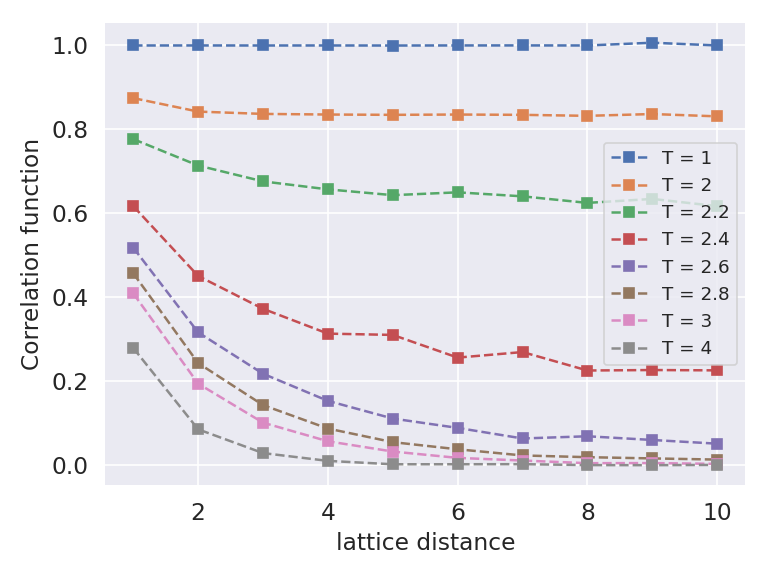

In [2]:
#Task4: calculate the correlation function as a function of the distance from the reference spin site.


# T_list contains the temperature for which the correlation function is computed
T_list = [1,2,2.2,2.4,2.6,2.8,3,4]

# G is a matrix that contains the value of the correlation function at a certain temperature (column)
# at a certain distance (row)
G = np.empty((int(N/2),len(T_list)))

# creating the visualization
figf,axf = plt.subplots()
for i,T in enumerate(T_list):
    system.T = T
    system.correlation()      # call correlation > metropolis_MC > flip
    G[:,i] = system.G_glob    # store G_glob inside G

    axf.plot(np.linspace(1,N/2,int(N/2)),G[:,i], 's--',label = "T = "+str(T))
    axf.set_xlabel("lattice distance", fontsize = 14)
    axf.set_ylabel("Correlation function", fontsize = 14)
    axf.tick_params(axis='both', which='major', labelsize=14) 
    axf.legend()
    

np.savetxt("Corr.txt",G,fmt = "%10.5f")
np.savetxt("position-Corr.txt",np.linspace(1,N/2,int(N/2)),fmt = "%10.5f")
    
figf.tight_layout()


### Animation: visualizing the spin lattice

In [ ]:
from tkinter import*
import numpy as np

window=Tk()
window.title("Simulation of 2D Ising Model")
window.geometry('+50+50')

class IsingSystem_2D:

    def __init__(self, size, temperature, exchange, external_field, m_steps, init_config,size_w):
        self.N = size
        self.T = temperature
        self.J = exchange
        self.B = external_field
        self.MC_steps = m_steps
        self.Kb = 1   # Botzmann constant
        self.u_b = 1  # bohr magneton
        self.G_glob=np.empty(int(size/2)) #correlation global function
        self.lattice = self.generate_lattice(init_config)
        self.square_w = size_w

        self.Ene()
        self.Magn()

	#defining a function that will assign a color to the pixel for the corrisponding site      
    def pixel(self,i,j):
        if self.lattice[i,j]==1:
            temp="#cc0000"#spin up
        else:
            temp= "#fffafa"#spin down
        image1.put(temp,to=(i*self.square_w,j*self.square_w,(i+1)*self.square_w,(j+1)*self.square_w)) 

    def generate_lattice(self, init_config):

        """
        Generating a 2D lattice with a random spin configuration, lattice:
        NxN array with each entry in the array being +1 or -1, representing
        the direction of the spin of the particle on that lattice site

        init_config == 0: random initial lattice
        init_config == 1: hot initial lattice
        init_config == -1: cold initial lattice
        init_config == 10: initial equiilibration is performed

        """
        if init_config == 0:
            lattice = np.random.choice([-1, 1], (self.N, self.N))
         

        if init_config == 1:
            lattice = np.empty((self.N,self.N))
            lattice[:,:] = 1
            
        if init_config == -1:
            lattice = np.empty((self.N,self.N))
            lattice[:,:] = -1
             
        if init_config == 10: 
            self.lattice = np.random.choice([-1, 1], (self.N, self.N))
            #lattice = np.empty((self.N,self.N))
            self.equilibration
            lattice = self.lattice

        return lattice


    def site_E(self, site):
        """
        Finding the contribution to the total energy from a single lattice site

        """
        #Extracting x and y indices
        x = site[0]
        y = site[1]

        #Interaction term  (using % operator to apply periodic boundary conditions)
        interaction_E = -1 * self.J * self.lattice[x, y] *(
            self.lattice[(x + 1)% self.N, y] + 
            self.lattice[x, (y + 1) % self.N] + 
            self.lattice[(x -  1)% self.N, y] + 
            self.lattice[x, (y - 1)% self.N]
            )

        external_E = -self.B* self.u_b * self.lattice[x, y]  #External energy term
                                                   # Is Bohr's magneton by default equal to 1?
                                                   # If so, we could create another class attribute for it (e.g, self.u_b)        
        Etot = interaction_E + external_E  #Total energy
        return Etot



    def Ene(self):
        """
        Finding the energy (per lattice site) associated 
        with the lattice in a specific microstate

        """    
        E = 0
        for i in range(self.N):
            for j in range(self.N):
                E += self.site_E([i,j])         
        E *= 1./(self.N **2) #Energy per lattice site 
        self.Ene = E    


    def Magn(self):
        """
        Finding the overall magnetisation (per lattice site) associated
        with the lattice in a specific microstate

        """
        M = (np.sum(self.lattice))/(self.N**2) #Overall magnetisation per lattice site
        self.Magn = np.abs(M) 


    def flip(self):
            ix = int(np.random.random()*self.N)    # choose a random row and column
            iy = int(np.random.random()*self.N)
            delta_E = -2 * self.site_E([ix, iy]) #Energy difference between flipped and unflipped spin    
                #Flipping spin if deltaE is less than 0
            if (delta_E <= 0) or (np.exp(-(delta_E)/(self.Kb * tempscale.get())) > np.random.rand()):                                               
                self.lattice[ix,iy] *= -1
                self.pixel(ix,iy)              


    def equilibration(self):
        for n_steps in range(self.MC_steps):
            self.flip()


    def correlation(self):
        G_loc=np.empty(int(self.N/2))
        for r in range(1,int(self.N/2)+1):
            for n_steps in range(1, self.MC_steps + 1):

                self.flip()

                temp=0
                for i in range(self.N):
                    for k in range(self.N):
                        temp2 = self.lattice[i, k] *(
                                self.lattice[(i + r)% self.N, k] + 
                                self.lattice[i, (k + r) % self.N] + 
                                self.lattice[(i -  r)% self.N, k] + 
                                self.lattice[i, (k - r)% self.N]
                                   )

                        temp += temp2/4

                G_loc[r-1] += temp/self.N**2


            self.G_glob[r-1] = G_loc[r-1]/self.MC_steps


    def metropolis_MC(self):

        """
        Implementing the Metropolis algorithm (Monte Carlo), finding energy and
        magnetisation of the system after each sweep and finding the average
        energy and magnetisation over all sweeps

        """

        #Array containing lattice configuration after each Metropolis sweep
        #(dimensions: (num_steps + 1) x N x N)
        self.lattice_list = np.zeros([self.MC_steps + 1, self.N, self.N])   
        self.lattice_list[0] = self.lattice  

        if running:
            T=tempscale.get()
            for j in range(1, self.MC_steps + 1):
                self.flip()


            #Assigning updated lattice to lattice_output variable
                self.lattice_list[j] = self.lattice
        window.after(1,self.metropolis_MC)
#Lattice sizes
N =50

#Number of sweeps of Metropolis algorithm
num_steps = 1000

w = 10#input('cell width of each pixels:')#width of each sites
canv_w= N*w
running=False 


#creating the canvas to simulate the phase transitions
canvas=Canvas(window,width=canv_w,height=canv_w)
canvas.pack()
image1=PhotoImage(width=canv_w,height=canv_w)
canvas.create_image((3, 3),image=image1,anchor="nw",state="normal")

#defining a functiond that starts and stops the simulation
def start_stop():
    global running
    running=not running
    if running:
        startbutton.config(text="stop")
    else:
        startbutton.config(text="start")

controlFrame=Frame(window)#creats a frame for evrerything
controlFrame.pack()
tempscale=Scale(controlFrame,from_=0.01,to=10.,resolution=0.01,length=120,orient='horizontal')
tempscale.pack(side="left")
tempscale.set(2.46)
templabel=Label(controlFrame,text="temperature:")
templabel.pack(side="left")
spacer=Frame(controlFrame,width=40)
spacer.pack(side="left")
startbutton=Button(controlFrame, text="start",width=8,command=start_stop)
startbutton.pack(side="left")



    #Creating the system
system = IsingSystem_2D(size = N,
                      temperature = tempscale.get(),
                      exchange = 1,
                      external_field = 0,m_steps=num_steps, init_config=0, size_w = 10)

    #Running Metropolis
system.metropolis_MC()
window.mainloop()#runs the interface that simulates the lattice